In [3]:
"""
Created on Sun Jul 19 23:43:36 2020

@author: Pankaj Baishya
Credit: Reused code from the Udacity course
"""


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')

In [4]:
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#n order to understand how to break into the field, we will look at the CousinEducation field. 
#Use the schema dataset to answer this question. 
#Write a function called get_description that takes the schema dataframe and the column as a string, 
#and returns a string of the description for that column.
#Reused from the Udacity course
def get_description(column_name, schema=schema):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    desc = str(schema[schema['Column']==column_name]['Question'].values[0])
    return desc

In [6]:
#test your code
#Check your function against solution - you shouldn't need to change any of the below code
get_description(df.columns[0]) # This should return a string of the first column description


'Respondent ID number'

In [7]:
#The question we have been focused on has been around Ways to become a developer
#Use your get_description function below to take a closer look at the CousinEducation column.
get_description('CousinEducation')

"Let's pretend you have a distant cousin. They are 24 years old, have a college degree in a field not related to computer programming, and have been working a non-coding job for the last two years. They want your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to your cousin?\nLet's pretend you have a distant cousin named Robert. He is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. He wants your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to Robert?\nLet's pretend you have a distant cousin named Alice. She is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. She wants your advice on how to switch to a career as a software developer. Which 

In [8]:
#Reused from the Udacity course
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row, add the devs
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    #clean up the resulting dataframe8
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

In [9]:
#Extact the possible values for CousinEducation
possible_vals = ["Take online courses", "Buy books and work through the exercises", 
                 "None of these", "Part-time/evening courses", "Return to college",
                 "Contribute to open source", "Conferences/meet-ups", "Bootcamp",
                 "Get a job as a QA tester", "Participate in online coding competitions",
                 "Master's degree", "Participate in hackathons", "Other"]

In [10]:
#Function to clean the CousinEducation values in the dataframe
#Reused from the Udacity course
def clean_and_plot(df, title='Method of Educating Suggested', plot=True):
    '''
    INPUT 
        df - a dataframe holding the CousinEducation column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the CousinEducation column.
    '''
    study = df['CousinEducation'].value_counts().reset_index()
    study.rename(columns={'index': 'method', 'CousinEducation': 'count'}, inplace=True)
    study_df = total_count(study, 'method', 'count', possible_vals)

    study_df.set_index('method', inplace=True)
    if plot:
        (study_df/study_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_study_df = study_df/study_df.sum()
    return props_study_df


## ***********************Ways to become a developer***********    

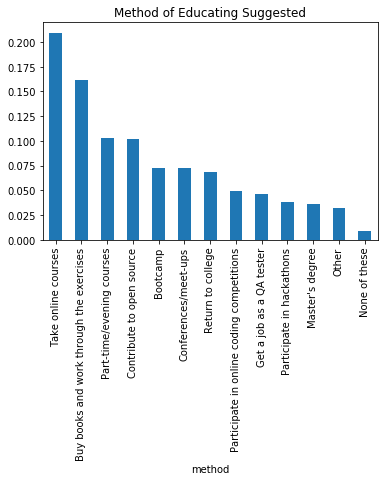

In [11]:
#***********************Ways to become a developer***********
props_df = clean_and_plot(df)

## ************************Job Placement and Salary rates for bootcamps*******************

(2602, 154)


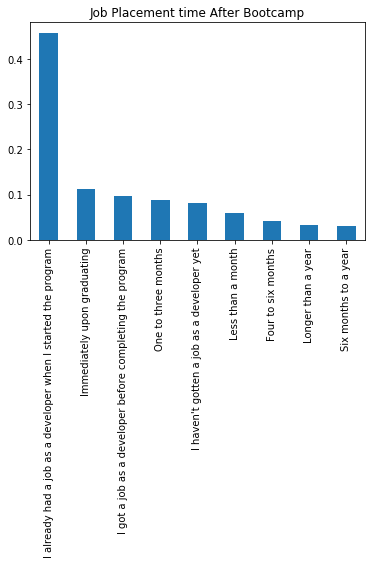

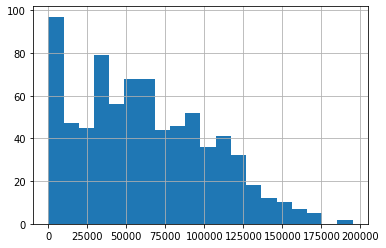

In [13]:
#************************Job Placement and Salary rates for bootcamps*******************
bootcamps_df = df[df['TimeAfterBootcamp'].isna()==False]
print(bootcamps_df.shape)

bootcamps_df_time = bootcamps_df['TimeAfterBootcamp'].value_counts() / bootcamps_df.shape[0]

bootcamps_df_time.plot(kind='bar', legend=None);
plt.title("Job Placement time After Bootcamp");
plt.show()

bootcamps_df_salary = bootcamps_df['Salary'].hist(bins=20);

## ***********************Salary and job Satisfaction based on Company Size.**************

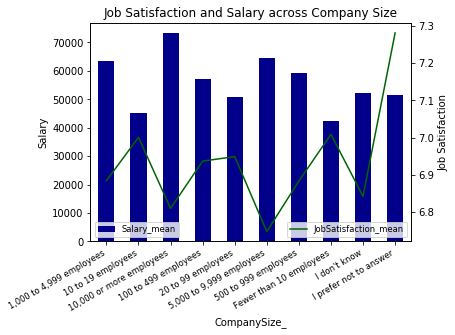

In [18]:
#***********************Salary and job Satisfaction based on Company Size.**************
JobSatisfaction_df = df[df['JobSatisfaction'].isna()==False]
#JobSatisfaction_df.shape
JobSatisfaction_df_grp_CompanySize = JobSatisfaction_df.groupby('CompanySize')['JobSatisfaction'].mean()

Salary_df = df[df['Salary'].isna()==False]
#Salary_df.shape
Salary_df_grp_CompanySize = Salary_df.groupby('CompanySize')['Salary'].mean()


df_grp_CompanySize = df.groupby('CompanySize').agg(
    {
        'JobSatisfaction':['mean'],
        'Salary':['mean']    # Sum duration per group        
    }
).reset_index()
df_grp_CompanySize.columns = df_grp_CompanySize.columns.map('_'.join)

#df_grp_CompanySize

ax=df_grp_CompanySize.plot(kind='bar', color = 'DarkBlue', x='CompanySize_', y='Salary_mean', legend=False);
ax2 = df_grp_CompanySize.plot(ax=ax,kind='line', color = 'DarkGreen', x='CompanySize_', y='JobSatisfaction_mean', 
                              secondary_y=True, legend=False);
ax.set_ylabel('Salary')
ax2.set_ylabel('Job Satisfaction')
plt.title("Job Satisfaction and Salary across Company Size");
plt.tight_layout()
plt.xticks(rotation='vertical')
ax.legend(loc="lower left", fontsize='small')
ax2.legend(loc="lower right", fontsize='small')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right', fontsize='small')
plt.show()